In [1]:
%matplotlib inline

In [2]:
from maelzel.core import *
from maelzel.core import plotting

In [5]:
s = Score([
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      5Gb-!,4A:ff
      0A:1
    ''')
])

getWorkspace().setScoreStruct(r'''4/4; 3/4''')


<Axes: >

/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)


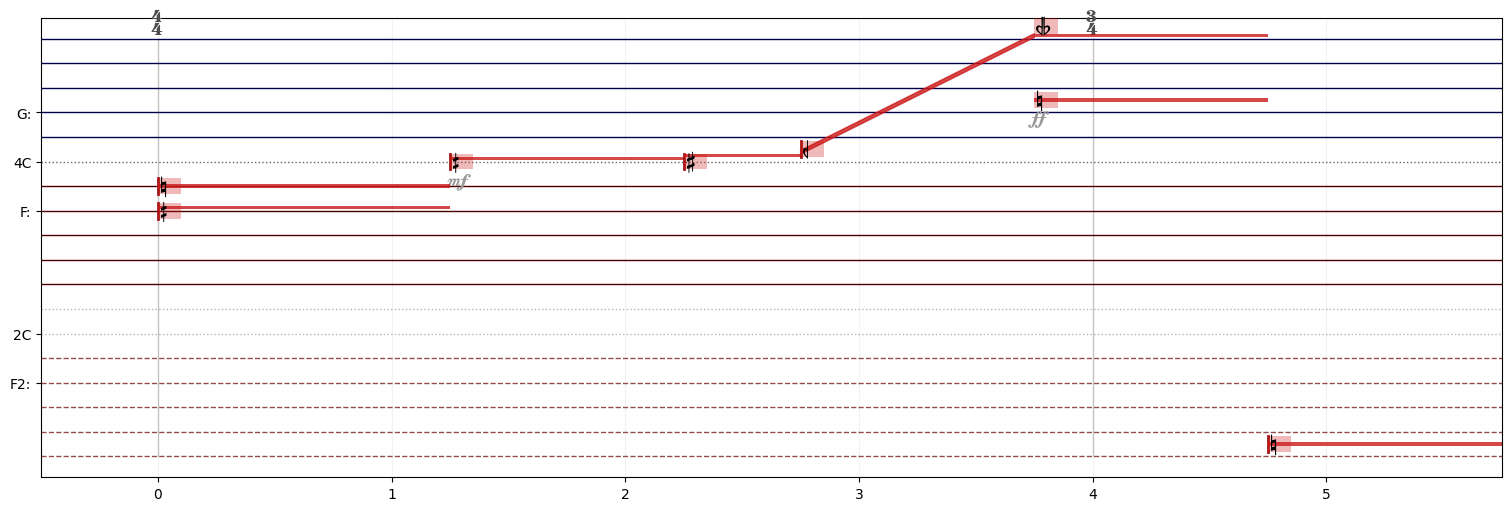

In [6]:
s.plot()

In [7]:
_plot.plotVoices(s.voices, accidentalColor=(0.1, 0.1, 0.1, 1), accidentalSize=20, eventStartLineWidth=3, chordLink=False, 
                 eventHeight=1.3, eventHeadAlpha=0.4, accidentalFixedScale=True, figsize=(15, 5))

NameError: name '_plot' is not defined

In [16]:
s = Score([
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      6Gb-!,4A:ff
      1C:1
    '''),
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5:pp
      4D-:1:gliss
      6Gb-!,4A:ff
      1C:1
    ''').timeShift(0.5).transpose(-2.5)
])

getWorkspace().setScoreStruct(r'''
5/8
7/8
''')

<Axes: >

/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)


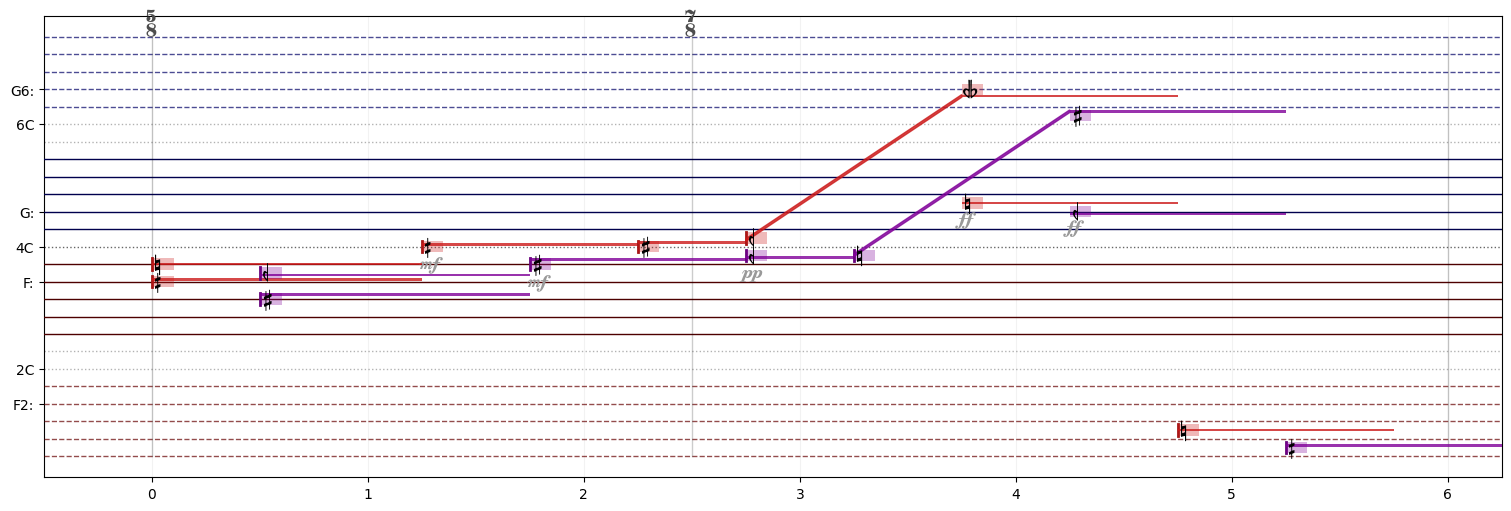

In [17]:
plotting.plotVoices(s.voices)

## Test clips

In [68]:
cl = Clip("../snd/colours-german-male.flac", pitch=60, speed=1)
samp = cl.asSample()
onsets = samp.onsets(threshold=0.05, mingap=1/10)
struct = getWorkspace().scorestruct
onsetbeats = [struct.timeToBeat(onset) for onset in onsets]

from itertools import pairwise
durs = [min(o2 - o1, 1/4) for o1, o2 in pairwise(onsetbeats)]


mnOut size: 926
m_pitchTrack size: 926


Voice([2B-42:~4/29♩:offset=0.325, 2A+38:~5/24♩:offset=0.464, 2B+18:~3/26♩:offset=0.673, 2B♭-07:~1/5♩:offset=1.44, 2A+34:1/4♩:offset=1.637, 2B♭-01:1/4♩:offset=2.879, 2A+40:1/4♩:offset=4.063, 2A-20:1/4♩:offset=4.447, 2A♯+22:~3/26♩:offset=5.306, 2G♯+29:~4/31♩:offset=5.422, …])
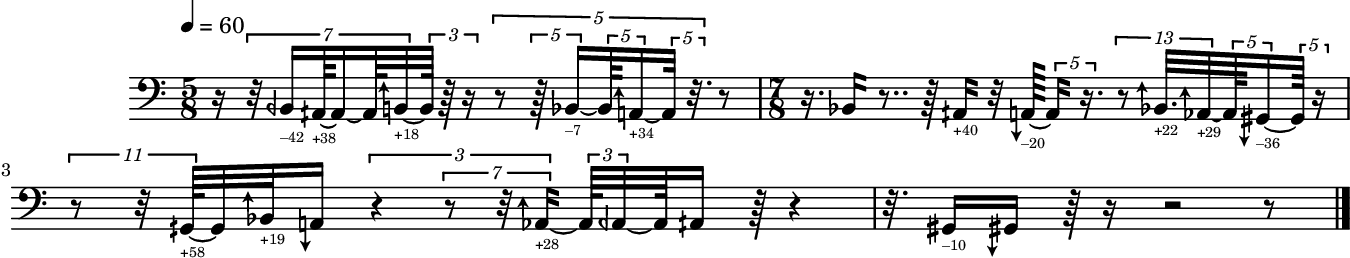

In [69]:
import pitchtools as pt
f0, voicedbpf = samp.fundamentalBpf()
freqs = f0.map(onsets)
transcr = Voice([Note(pt.f2m(freq), dur=dur, offset=beat) for beat, dur, freq in zip(onsetbeats, durs, freqs) if freq > 60])
transcr

In [71]:
with play():
    transcr.play(instr='.piano', position=1)
    cl.play(position=0)